## Árboles de decisión

In [1]:
# Librerias
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(2)

X, y = datasets.load_wine(return_X_y=True)
atributos = datasets.load_wine().feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scaling data
scaler1 = StandardScaler() 
scaler1.fit(X_train)  
X_train = scaler1.transform(X_train)  

scaler2 = StandardScaler() 
scaler2.fit(X_test)  
X_test = scaler2.transform(X_test) 

In [3]:
# Modelo
modelo = tree.DecisionTreeClassifier(criterion="gini",max_depth=3)
modelo.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [5]:
print(tree.export_text(modelo, feature_names=atributos))

|--- color_intensity <= -0.49
|   |--- proline <= 0.91
|   |   |--- class: 1
|   |--- proline >  0.91
|   |   |--- class: 0
|--- color_intensity >  -0.49
|   |--- flavanoids <= -0.39
|   |   |--- alcalinity_of_ash <= -0.74
|   |   |   |--- class: 1
|   |   |--- alcalinity_of_ash >  -0.74
|   |   |   |--- class: 2
|   |--- flavanoids >  -0.39
|   |   |--- proline <= 0.00
|   |   |   |--- class: 1
|   |   |--- proline >  0.00
|   |   |   |--- class: 0



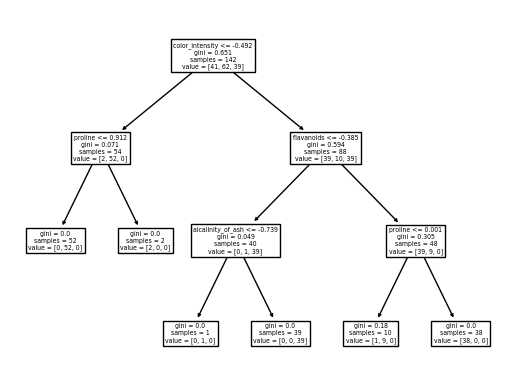

In [9]:
tree.plot_tree(modelo, feature_names=atributos)
plt.show()

In [11]:
tree.export_graphviz(modelo, out_file="vinos.txt", feature_names=atributos)